## Executive Summary

This analysis provides a comprehensive overview of credit card transaction patterns and associated fraud risks. Transaction amounts are predominantly small, exhibiting a strong right-skewed distribution with the majority (around 37%) falling below $20. A significant 92% of transactions are under $100, contrasting with a small fraction (720) exceeding $2000. Transaction activity peaked in December 2019, followed by a notable decline, suggesting potential seasonality or external influences. Geographically, most users originate from Texas, New York, and Pennsylvania, with females aged 30-60 being the most active demographic.

In terms of spending categories, "gas\_transport" leads in transaction volume, while in-store grocery purchases ("grocery\_pos") exhibit the highest average transaction amount, indicating frequent, substantial spending. Conversely, online grocery spending ("grocery\_net") shows lower average amounts. Travel, though infrequent, involves significant expenditure. Notably, transaction activity is distributed across various merchants, indicating no single dominant player.

Fraud analysis reveals minimal risk for low-value transactions but a concerning surge in the $800-$1000 range, pinpointing a critical vulnerability. Online "misc" and "shopping," along with offline "grocery\_pos," also exhibit elevated fraud percentages. These insights underscore the necessity for targeted fraud prevention strategies, especially focusing on high-value transactions and specific categories across both online and offline channels. The observed trends in transaction volume and user demographics can further inform business strategies and risk management.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet("transformed_cc_credit_card\cc_credit_card_transformed.parquet")

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### [1] Distribution for transaction amount

In [4]:
# Print the minimum and maximum transaction amounts
print(f"Minimun transaction amount: {df['amt'].min()}\nMaximum transaction amount: {df['amt'].max()}")


Minimun transaction amount: 1.0
Maximum transaction amount: 28948.9


In [5]:

# print the frequency distribution of transaction amounts

bins = [0,20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000, float('inf')] 
frequency_table = pd.cut(df['amt'], bins=bins).value_counts().sort_index()  
print("Frequency Distribution of Amount:")
print(frequency_table)

Frequency Distribution of Amount:
amt
(0.0, 20.0]         424429
(20.0, 40.0]        157956
(40.0, 60.0]        186632
(60.0, 80.0]        181879
(80.0, 100.0]       110886
(100.0, 120.0]       66520
(120.0, 140.0]       45224
(140.0, 160.0]       27396
(160.0, 180.0]       17336
(180.0, 200.0]       16493
(200.0, 220.0]       13199
(220.0, 240.0]        7854
(240.0, 260.0]        4414
(260.0, 280.0]        3269
(280.0, 300.0]        2890
(300.0, 320.0]        2529
(320.0, 340.0]        2021
(340.0, 360.0]        1545
(360.0, 380.0]        1320
(380.0, 400.0]        1185
(400.0, 420.0]        1070
(420.0, 440.0]        1061
(440.0, 460.0]        1233
(460.0, 480.0]        1367
(480.0, 500.0]        1336
(500.0, 520.0]        1268
(520.0, 540.0]        1088
(540.0, 560.0]         890
(560.0, 580.0]         702
(580.0, 600.0]         610
(600.0, 620.0]         472
(620.0, 640.0]         397
(640.0, 660.0]         363
(660.0, 680.0]         374
(680.0, 700.0]         339
(700.0, 720.0]   

c:\Users\chia_\OneDrive\Desktop\DE_inter\paynet\venv\Lib\site-packages\seaborn\distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


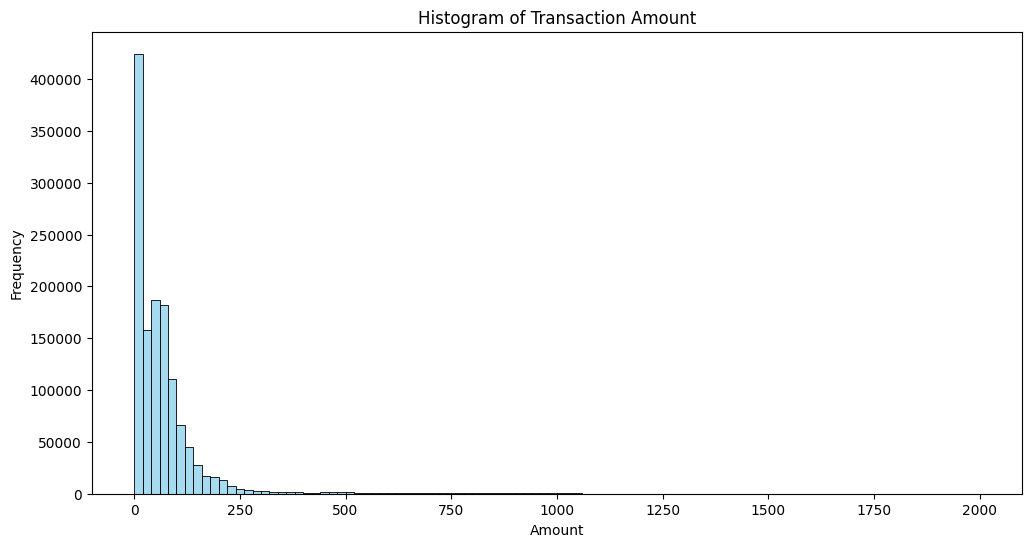

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(df['amt'], bins=bins, color='skyblue')
plt.title('Histogram of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


### Conclusion [1]
<p> 
Most of the transaction happen below majority of transactions fall below 20 ~36.9% <br>
strong right-skewed distribution where most transactions are small <br>
<br>
~92% of the transaction is below 100 <br>
Only 720 transaction from the dataset is >2000 <br>
</p>

### [2] transaction count/amount over time

In [8]:
txn_df = df.copy()

In [9]:
txn_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,merch_zipcode,merch_last_update_time,merch_eff_time,age,cc_bic,category,gender
0,162992,2019-03-27 14:58:13.000,Mkpx4n8KHhhaZSf7htKJDgjx5V261mHr1Gr1eTtgbN5Xm+fl5j8oA3cqrAc=,fraud_Lind-Buckridge,131.71,cSlmBFtNUIIwci6e1txKbyCp2cd/MkN13a7iOBvFqEp5MPGU,H5RDp3dHGGaRpA93Hi+2mb9zu+qfckzf9cKP+9AglG4vZg==,9oXHXrUl1Jmnh25E8PKZV2yEWaCJL1SA3YCQ9Oqu/rOd8cbyiqphu1STNCIJG6lP0duaSPCEOA==,Hurricane,WV,25526,38.4257,-81.9943,21902,Sub,/BtX9LbvQIFGs9R4o8iDE1TCJ2kaoHQEknsMb+Gc12i3KP4m+ko=,9d10998aac3d3103a14eb79d9f0fced5,38.445424,-81.292151,0,25030,1970-01-16 17:44:20.000,2012-03-27 22:58:13.000,45,ACEEUS31,entertainment,F
1,212746,2019-04-18 20:55:39.000,RyOtgM3SMgWnAacPK4UUKIt1GTtGN0ME2KO+5qPjP7x+YNYHHNkbbRU=,fraud_Wilkinson Ltd,108.68,AwgrJYO3V5nUcnNQ0AbSMUkUz4DazYEUC2nAa1FJ1O/u9pRT,Lcx+2OqoLTPF8MojiF5wEQ3VaxnbuIRZejl/a2hKbYzg3A==,cdZs7576fHwR1XZTV+j1OTqmgMa11WYDj3LPvG3BzI2G4XI9A/8B8nGR3PiyzudjOLEwCrr7,Rosewood,OH,43070,40.2158,-83.9579,133,Professor Emeritus,HDVoU+P9dL0FNKbyWsNOXFL9dvgCzfBjGOnzkJSt8GalMfcLqiE=,997a78a55cc54c63ae39363c62162a53,40.390694,-83.591434,0,43358,1970-01-16 18:16:22.000,2012-04-19 04:55:39.000,71,ACEEUS31,entertainment,F
2,163146,2019-03-27 17:02:27.000,uVB2QAYiRq7BgPC+pxns0NWzd+CetyiCEjBfpk9m0A7/26XoqT9Wvbba,"fraud_Schaefer, Fay and Hilll",51.92,LRzQ2GUAiHDJnzUbdxv+cs6m0W4LKNfrf+cBgvWRCC2SzI0Ykg==,4hqKie7DvSFXbnW8djp5o+u2V7qRk34Cm9FLFyxv+C6D,zWLybp1CPxyiuVKNf+iSOlrSdZWJ24usLvXdtOt7DlWzj4doVzZkDzRqKFDXaQ==,Central,IN,47110,38.0970,-86.1723,350,Counsellor,UzLNTBi8PABTuFVYT/Raj86tIFel2mvVQhpLkCJoT7Sx2Ug8JQY=,2ae3152edabad7535bfde77ace64479e,38.765765,-86.943872,0,47562,1970-01-16 17:44:27.000,2012-03-28 01:02:27.000,70,ACEEUS31,entertainment,F
3,212752,2019-04-18 20:59:06.000,T4I0YKYTwpgSB8Kh/Wv4NRCbZ2EyzEf2ZL7OI0dHknx9VOiooHbQeXalxQQ=,fraud_Grimes LLC,11.71,KywqreWHWGysvJsBt32ffhUED24TJ15socjzfdv9UBXcG4U=,J4HpCb7vfOIuTEeHEmpm03gxIL2rK0+5ETOGxC6hQzNg,HeD5zdG8Lcasd7hVhp9RR2OI3HSpwh24SJZMx9qmvnFewrJrhiF/uvKbvPxGGEPl/v8JmEsaIw==,Drakes Branch,VA,23937,36.9688,-78.5615,1970,Energy engineer,nGjh7vnDlOhEGLsrMZplOmRd0z+BnSkJqdhcuzJvHjpUWQbnjzs=,09b840f44eee2a1358da6435fbdd0181,36.201029,-78.395291,0,27544,1970-01-16 18:16:22.000,2012-04-19 04:59:06.000,40,ACEEUS31,entertainment,F
4,163392,2019-03-27 19:58:58.000,qq/LxLlhPXxpG9Nf4QieGT/pKcOtbaRVyhkSV+uVzkMUQrkZXq3Kn7bb6z0=,fraud_Nienow PLC,21.44,o4PYmupU1AsmcBgx+eRaJ7iBm8Un7hthJBhXzZGyJDRhc5Q=,91l5aXc+vSrnVFOQ8Ac2pHictmV5poDuXnEe7OeiqtsFKIo=,+Cml3xQaYfZNi37nWhSHO+4Gb4VkJJExNyQeLB8bYTRsiKgdkQjsfmOB6Bf2,Manville,WY,82227,42.7300,-104.7024,241,Educational psychologist,vWQe7DfrsDmrq1hU862kqaj9kAraFZZgsc+szzrLjYVFwNjL1HQ=,48054f8a85ffdff03d901db3b5983d37,43.045387,-104.668606,0,82224,1970-01-16 17:44:38.000,2012-03-28 03:58:58.000,45,ACEEUS31,entertainment,F


In [10]:
txn_df['trans_date_trans_time'] = pd.to_datetime(txn_df['trans_date_trans_time'])

In [11]:
# group by resample 'ME' -> date month end 
# reason using ME instead of MS is because i wish to standardize the number of transaction [foramt] in each month as of end of month 
monthly_amount = txn_df.set_index('trans_date_trans_time')['amt'].resample('ME').sum()
monthly_count = txn_df.set_index('trans_date_trans_time')['amt'].resample('ME').count()


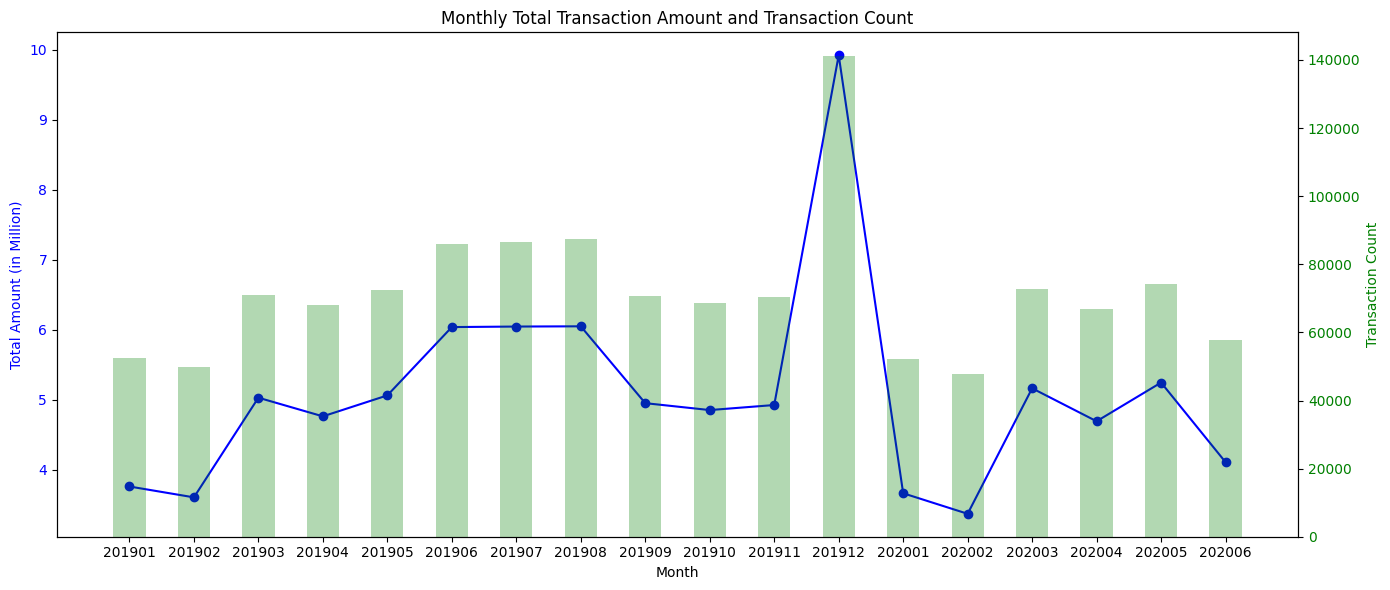

In [12]:
fig, ax1 = plt.subplots(figsize=(14, 6))

plt.title('Monthly Total Transaction Amount and Transaction Count')

ax1.plot(monthly_amount.index.strftime('%Y%m'), monthly_amount.values / 1000000, marker='o', linestyle='-', color='b')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Amount (in Million)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar(monthly_count.index.strftime('%Y%m'), monthly_count.values, color='g', alpha=.3, width=0.5,label='Transaction Count')
ax2.set_ylabel('Transaction Count', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.tight_layout()

plt.show()

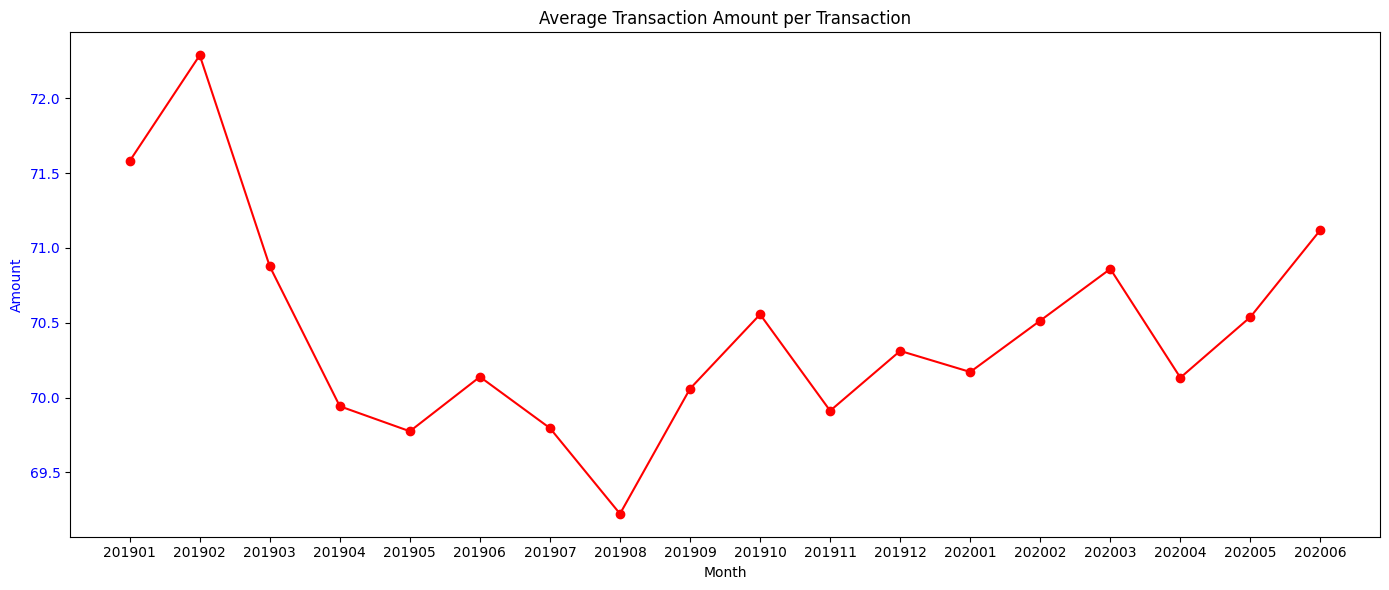

In [13]:
fig, ax1 = plt.subplots(figsize=(14, 6))
plt.title('Average Transaction Amount per Transaction')

ax1.plot(monthly_amount.index.strftime('%Y%m'), monthly_amount / monthly_count , marker='o', linestyle='-', color='r')
ax1.set_xlabel('Month')
ax1.set_ylabel('Amount', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.tight_layout()

plt.show()


In [14]:
print(f'lower limit: {min(monthly_amount / monthly_count)}\nupper limit: {max(monthly_amount / monthly_count)}\nrange: {min(monthly_amount / monthly_count)}')

lower limit: 69.22341888071064
upper limit: 72.28697368948782
range: 69.22341888071064


In [15]:
(monthly_amount / monthly_count).mean()

np.float64(70.43291312799958)

In [16]:
monthly_amount.corr(monthly_count)

np.float64(0.9995962727109472)


### Conclusion [2]

<p> 

Most of the transaction happen on December 2019 <br>
Post-December 2019, there\'s a sharp decline in both amount and count, possibly due to a seasonal or external event (e.g., holidays, economic changes). <br>
the average transaction amount/transaction per month is between 69.22 and 72.28 with the highest of 72.28 on February 2019

the data denode a strong positive correlation (0.99995) between the number of transaction with the total transaction amount<br>
<br>

<br>
</p>

### [3] Demographic Variable

In [17]:
demographic_df = df.copy()

In [18]:
demographic_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,merch_zipcode,merch_last_update_time,merch_eff_time,age,cc_bic,category,gender
0,162992,2019-03-27 14:58:13.000,Mkpx4n8KHhhaZSf7htKJDgjx5V261mHr1Gr1eTtgbN5Xm+fl5j8oA3cqrAc=,fraud_Lind-Buckridge,131.71,cSlmBFtNUIIwci6e1txKbyCp2cd/MkN13a7iOBvFqEp5MPGU,H5RDp3dHGGaRpA93Hi+2mb9zu+qfckzf9cKP+9AglG4vZg==,9oXHXrUl1Jmnh25E8PKZV2yEWaCJL1SA3YCQ9Oqu/rOd8cbyiqphu1STNCIJG6lP0duaSPCEOA==,Hurricane,WV,25526,38.4257,-81.9943,21902,Sub,/BtX9LbvQIFGs9R4o8iDE1TCJ2kaoHQEknsMb+Gc12i3KP4m+ko=,9d10998aac3d3103a14eb79d9f0fced5,38.445424,-81.292151,0,25030,1970-01-16 17:44:20.000,2012-03-27 22:58:13.000,45,ACEEUS31,entertainment,F
1,212746,2019-04-18 20:55:39.000,RyOtgM3SMgWnAacPK4UUKIt1GTtGN0ME2KO+5qPjP7x+YNYHHNkbbRU=,fraud_Wilkinson Ltd,108.68,AwgrJYO3V5nUcnNQ0AbSMUkUz4DazYEUC2nAa1FJ1O/u9pRT,Lcx+2OqoLTPF8MojiF5wEQ3VaxnbuIRZejl/a2hKbYzg3A==,cdZs7576fHwR1XZTV+j1OTqmgMa11WYDj3LPvG3BzI2G4XI9A/8B8nGR3PiyzudjOLEwCrr7,Rosewood,OH,43070,40.2158,-83.9579,133,Professor Emeritus,HDVoU+P9dL0FNKbyWsNOXFL9dvgCzfBjGOnzkJSt8GalMfcLqiE=,997a78a55cc54c63ae39363c62162a53,40.390694,-83.591434,0,43358,1970-01-16 18:16:22.000,2012-04-19 04:55:39.000,71,ACEEUS31,entertainment,F
2,163146,2019-03-27 17:02:27.000,uVB2QAYiRq7BgPC+pxns0NWzd+CetyiCEjBfpk9m0A7/26XoqT9Wvbba,"fraud_Schaefer, Fay and Hilll",51.92,LRzQ2GUAiHDJnzUbdxv+cs6m0W4LKNfrf+cBgvWRCC2SzI0Ykg==,4hqKie7DvSFXbnW8djp5o+u2V7qRk34Cm9FLFyxv+C6D,zWLybp1CPxyiuVKNf+iSOlrSdZWJ24usLvXdtOt7DlWzj4doVzZkDzRqKFDXaQ==,Central,IN,47110,38.0970,-86.1723,350,Counsellor,UzLNTBi8PABTuFVYT/Raj86tIFel2mvVQhpLkCJoT7Sx2Ug8JQY=,2ae3152edabad7535bfde77ace64479e,38.765765,-86.943872,0,47562,1970-01-16 17:44:27.000,2012-03-28 01:02:27.000,70,ACEEUS31,entertainment,F
3,212752,2019-04-18 20:59:06.000,T4I0YKYTwpgSB8Kh/Wv4NRCbZ2EyzEf2ZL7OI0dHknx9VOiooHbQeXalxQQ=,fraud_Grimes LLC,11.71,KywqreWHWGysvJsBt32ffhUED24TJ15socjzfdv9UBXcG4U=,J4HpCb7vfOIuTEeHEmpm03gxIL2rK0+5ETOGxC6hQzNg,HeD5zdG8Lcasd7hVhp9RR2OI3HSpwh24SJZMx9qmvnFewrJrhiF/uvKbvPxGGEPl/v8JmEsaIw==,Drakes Branch,VA,23937,36.9688,-78.5615,1970,Energy engineer,nGjh7vnDlOhEGLsrMZplOmRd0z+BnSkJqdhcuzJvHjpUWQbnjzs=,09b840f44eee2a1358da6435fbdd0181,36.201029,-78.395291,0,27544,1970-01-16 18:16:22.000,2012-04-19 04:59:06.000,40,ACEEUS31,entertainment,F
4,163392,2019-03-27 19:58:58.000,qq/LxLlhPXxpG9Nf4QieGT/pKcOtbaRVyhkSV+uVzkMUQrkZXq3Kn7bb6z0=,fraud_Nienow PLC,21.44,o4PYmupU1AsmcBgx+eRaJ7iBm8Un7hthJBhXzZGyJDRhc5Q=,91l5aXc+vSrnVFOQ8Ac2pHictmV5poDuXnEe7OeiqtsFKIo=,+Cml3xQaYfZNi37nWhSHO+4Gb4VkJJExNyQeLB8bYTRsiKgdkQjsfmOB6Bf2,Manville,WY,82227,42.7300,-104.7024,241,Educational psychologist,vWQe7DfrsDmrq1hU862kqaj9kAraFZZgsc+szzrLjYVFwNjL1HQ=,48054f8a85ffdff03d901db3b5983d37,43.045387,-104.668606,0,82224,1970-01-16 17:44:38.000,2012-03-28 03:58:58.000,45,ACEEUS31,entertainment,F


In [19]:
# create surrogate key for each person with first and last name
demographic_df['person_id'] = demographic_df.groupby(['first','last']).ngroup()

In [20]:
demographic_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,merch_zipcode,merch_last_update_time,merch_eff_time,age,cc_bic,category,gender,person_id
0,162992,2019-03-27 14:58:13.000,Mkpx4n8KHhhaZSf7htKJDgjx5V261mHr1Gr1eTtgbN5Xm+fl5j8oA3cqrAc=,fraud_Lind-Buckridge,131.71,cSlmBFtNUIIwci6e1txKbyCp2cd/MkN13a7iOBvFqEp5MPGU,H5RDp3dHGGaRpA93Hi+2mb9zu+qfckzf9cKP+9AglG4vZg==,9oXHXrUl1Jmnh25E8PKZV2yEWaCJL1SA3YCQ9Oqu/rOd8cbyiqphu1STNCIJG6lP0duaSPCEOA==,Hurricane,WV,25526,38.4257,-81.9943,21902,Sub,/BtX9LbvQIFGs9R4o8iDE1TCJ2kaoHQEknsMb+Gc12i3KP4m+ko=,9d10998aac3d3103a14eb79d9f0fced5,38.445424,-81.292151,0,25030,1970-01-16 17:44:20.000,2012-03-27 22:58:13.000,45,ACEEUS31,entertainment,F,819596
1,212746,2019-04-18 20:55:39.000,RyOtgM3SMgWnAacPK4UUKIt1GTtGN0ME2KO+5qPjP7x+YNYHHNkbbRU=,fraud_Wilkinson Ltd,108.68,AwgrJYO3V5nUcnNQ0AbSMUkUz4DazYEUC2nAa1FJ1O/u9pRT,Lcx+2OqoLTPF8MojiF5wEQ3VaxnbuIRZejl/a2hKbYzg3A==,cdZs7576fHwR1XZTV+j1OTqmgMa11WYDj3LPvG3BzI2G4XI9A/8B8nGR3PiyzudjOLEwCrr7,Rosewood,OH,43070,40.2158,-83.9579,133,Professor Emeritus,HDVoU+P9dL0FNKbyWsNOXFL9dvgCzfBjGOnzkJSt8GalMfcLqiE=,997a78a55cc54c63ae39363c62162a53,40.390694,-83.591434,0,43358,1970-01-16 18:16:22.000,2012-04-19 04:55:39.000,71,ACEEUS31,entertainment,F,261634
2,163146,2019-03-27 17:02:27.000,uVB2QAYiRq7BgPC+pxns0NWzd+CetyiCEjBfpk9m0A7/26XoqT9Wvbba,"fraud_Schaefer, Fay and Hilll",51.92,LRzQ2GUAiHDJnzUbdxv+cs6m0W4LKNfrf+cBgvWRCC2SzI0Ykg==,4hqKie7DvSFXbnW8djp5o+u2V7qRk34Cm9FLFyxv+C6D,zWLybp1CPxyiuVKNf+iSOlrSdZWJ24usLvXdtOt7DlWzj4doVzZkDzRqKFDXaQ==,Central,IN,47110,38.0970,-86.1723,350,Counsellor,UzLNTBi8PABTuFVYT/Raj86tIFel2mvVQhpLkCJoT7Sx2Ug8JQY=,2ae3152edabad7535bfde77ace64479e,38.765765,-86.943872,0,47562,1970-01-16 17:44:27.000,2012-03-28 01:02:27.000,70,ACEEUS31,entertainment,F,474883
3,212752,2019-04-18 20:59:06.000,T4I0YKYTwpgSB8Kh/Wv4NRCbZ2EyzEf2ZL7OI0dHknx9VOiooHbQeXalxQQ=,fraud_Grimes LLC,11.71,KywqreWHWGysvJsBt32ffhUED24TJ15socjzfdv9UBXcG4U=,J4HpCb7vfOIuTEeHEmpm03gxIL2rK0+5ETOGxC6hQzNg,HeD5zdG8Lcasd7hVhp9RR2OI3HSpwh24SJZMx9qmvnFewrJrhiF/uvKbvPxGGEPl/v8JmEsaIw==,Drakes Branch,VA,23937,36.9688,-78.5615,1970,Energy engineer,nGjh7vnDlOhEGLsrMZplOmRd0z+BnSkJqdhcuzJvHjpUWQbnjzs=,09b840f44eee2a1358da6435fbdd0181,36.201029,-78.395291,0,27544,1970-01-16 18:16:22.000,2012-04-19 04:59:06.000,40,ACEEUS31,entertainment,F,465090
4,163392,2019-03-27 19:58:58.000,qq/LxLlhPXxpG9Nf4QieGT/pKcOtbaRVyhkSV+uVzkMUQrkZXq3Kn7bb6z0=,fraud_Nienow PLC,21.44,o4PYmupU1AsmcBgx+eRaJ7iBm8Un7hthJBhXzZGyJDRhc5Q=,91l5aXc+vSrnVFOQ8Ac2pHictmV5poDuXnEe7OeiqtsFKIo=,+Cml3xQaYfZNi37nWhSHO+4Gb4VkJJExNyQeLB8bYTRsiKgdkQjsfmOB6Bf2,Manville,WY,82227,42.7300,-104.7024,241,Educational psychologist,vWQe7DfrsDmrq1hU862kqaj9kAraFZZgsc+szzrLjYVFwNjL1HQ=,48054f8a85ffdff03d901db3b5983d37,43.045387,-104.668606,0,82224,1970-01-16 17:44:38.000,2012-03-28 03:58:58.000,45,ACEEUS31,entertainment,F,1055428


In [21]:
# extract unique person_id
demographic_var_df = demographic_df[['person_id','state','gender','age']].drop_duplicates()

In [22]:
demographic_var_df.head(5)

,person_id,state,gender,age
0,819596,WV,F,45
1,261634,OH,F,71
2,474883,IN,F,70
3,465090,VA,F,40
4,1055428,WY,F,45


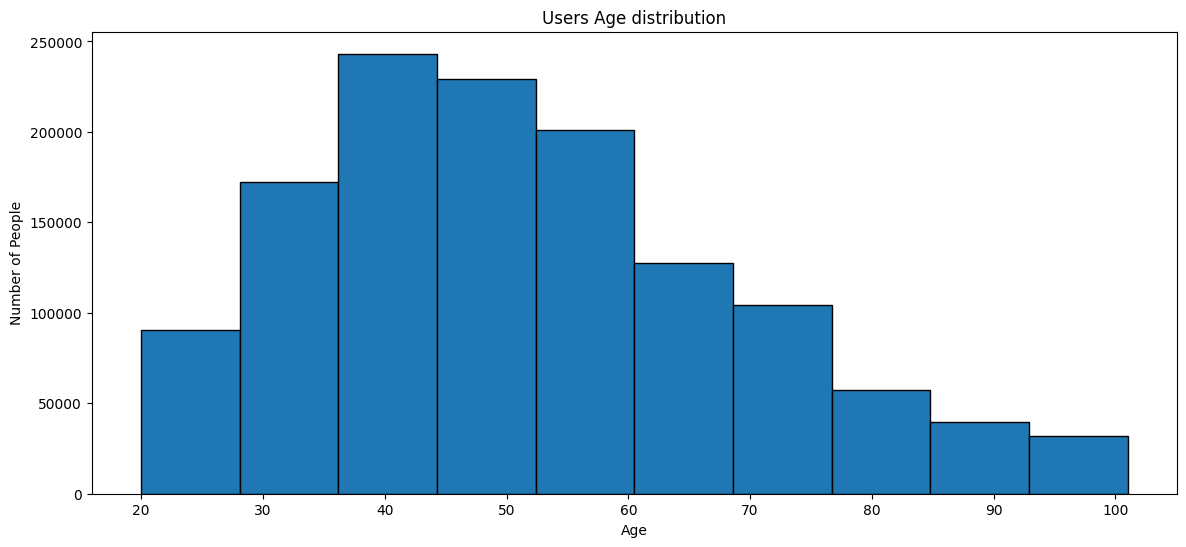

In [23]:
plt.figure(figsize=(14, 6))
plt.hist(demographic_var_df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Users Age distribution')
plt.show()

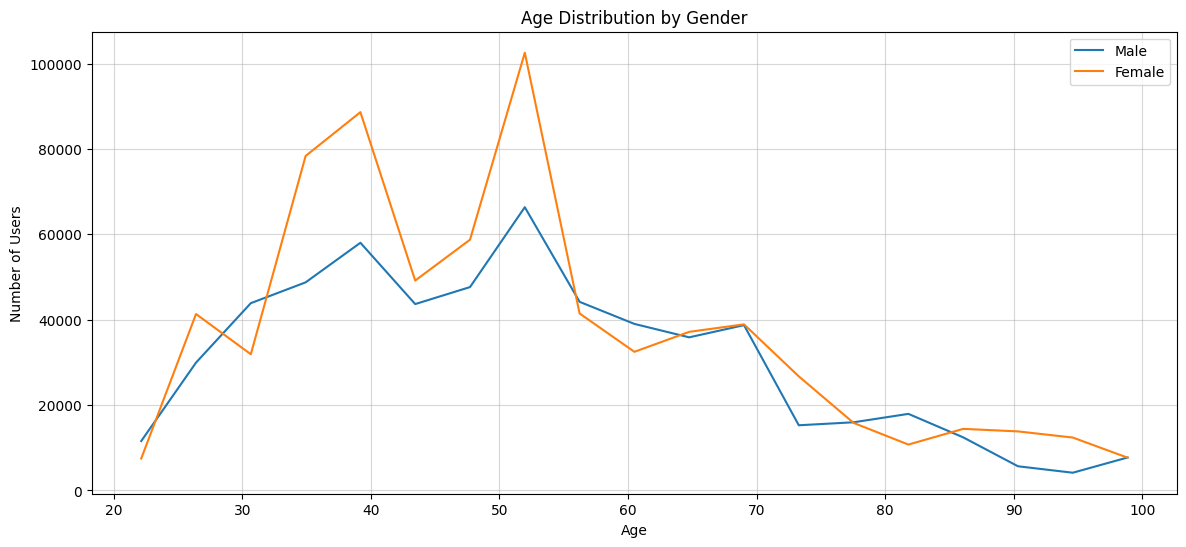

In [24]:
bins = np.linspace(demographic_var_df['age'].min(), demographic_var_df['age'].max(), 20)  

male_age_freq, _ = np.histogram(demographic_var_df[demographic_var_df['gender'] == 'M']['age'], bins=bins)
female_age_freq, _ = np.histogram(demographic_var_df[demographic_var_df['gender'] == 'F']['age'], bins=bins)

bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(14, 6))
plt.plot(bin_centers, male_age_freq, label='Male')
plt.plot(bin_centers, female_age_freq, label='Female')

plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Age Distribution by Gender')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

In [25]:
#  get the state table at US_state.csv
state_df = pd.read_csv('US_state.csv')
state_df.head(5)

,State Name,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [26]:
demographic_var_df.head(3)

,person_id,state,gender,age
0,819596,WV,F,45
1,261634,OH,F,71
2,474883,IN,F,70


In [27]:
merged_state_df = pd.merge(demographic_var_df, state_df, left_on='state', right_on='Abbreviation', how='left')

In [28]:
merged_state_df.head(3)

,person_id,state,gender,age,State Name,Abbreviation
0,819596,WV,F,45,West Virginia,WV
1,261634,OH,F,71,Ohio,OH
2,474883,IN,F,70,Indiana,IN


In [29]:
# DC is null 
merged_state_df[merged_state_df['State Name'].isna()].head(5)

,person_id,state,gender,age,State Name,Abbreviation
29,37553,DC,F,39,NaN,NaN
1996,620534,DC,F,39,NaN,NaN
2203,1096765,DC,F,39,NaN,NaN
2478,641469,DC,F,39,NaN,NaN
3318,1246009,DC,F,39,NaN,NaN


In [32]:
merged_state_df['State Name'] = merged_state_df.apply(lambda x: 'Washington, D.C' if x['state'] =='DC' else x['State Name'], axis=1)

In [33]:
merged_state_df[merged_state_df['State Name'].isna()].head()

,person_id,state,gender,age,State Name,Abbreviation


In [38]:
state_user_df = merged_state_df['State Name'].value_counts()

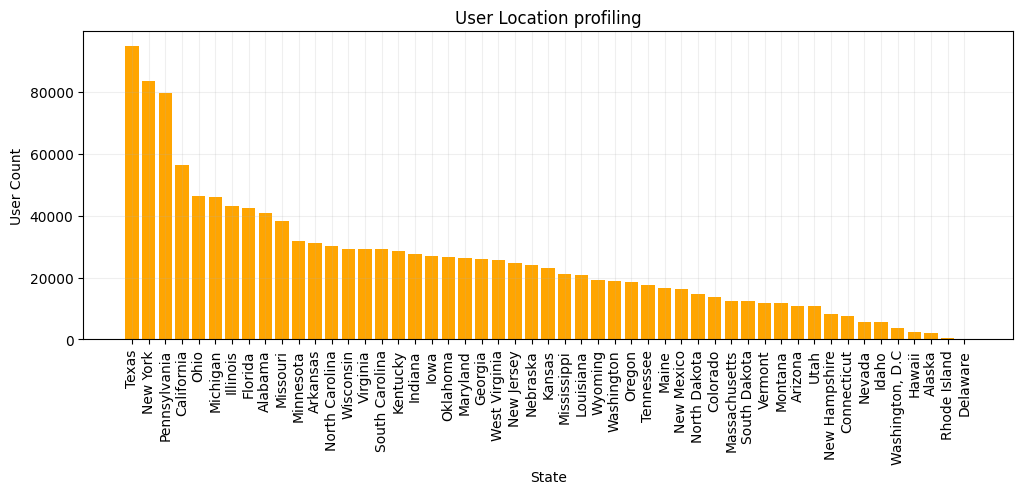

In [45]:
plt.figure(figsize=(12, 4))
plt.bar(state_user_df.index,state_user_df.values, color = 'orange')

plt.xlabel('State')
plt.ylabel('User Count')
plt.title('User Location profiling')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.2)
plt.show()

In [46]:
age_gender_spending = demographic_df.groupby(['age','gender']).size()

C:\Users\chia_\AppData\Local\Temp\ipykernel_6712\159080244.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_spending = demographic_df.groupby(['age','gender']).size()


In [47]:
age_gender_spending = age_gender_spending.reset_index()
age_gender_spending.columns = ['age','gender','frequency']

In [48]:
age_gender_spending.dtypes

age             int32
gender       category
frequency       int64
dtype: object

C:\Users\chia_\AppData\Local\Temp\ipykernel_6712\1422175011.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_spending = age_gender_spending.groupby(['age_group', 'gender'])['frequency'].sum().reset_index()


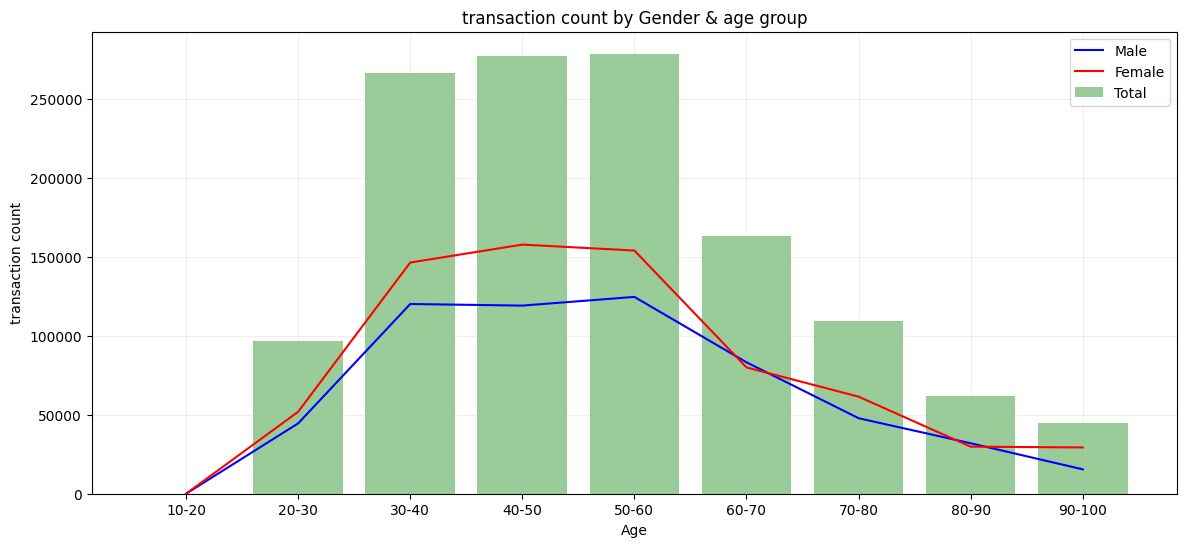

In [49]:
#  reference for bin : https://realpython.com/np-linspace-numpy/
bins = np.linspace(10, 100, 10) 
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins) - 1)]

# Create a new column for the age group
age_gender_spending['age_group'] = pd.cut(age_gender_spending['age'], bins=bins, labels=labels, right=False)

# Group by age group and gender, and sum the frequency
grouped_spending = age_gender_spending.groupby(['age_group', 'gender'])['frequency'].sum().reset_index()

male_age_freq = grouped_spending[grouped_spending['gender'] == 'M']['frequency']
female_age_freq = grouped_spending[grouped_spending['gender'] == 'F']['frequency']
total_freq = (male_age_freq.reset_index() + female_age_freq.reset_index())['frequency']

plt.figure(figsize=(14, 4))
plt.bar(grouped_spending[grouped_spending['gender'] == 'M']['age_group'],total_freq, label='Total', alpha=0.4,color='g')

plt.plot(grouped_spending[grouped_spending['gender'] == 'M']['age_group'],male_age_freq, label='Male', color = 'blue')
plt.plot(grouped_spending[grouped_spending['gender'] == 'F']['age_group'], female_age_freq, label='Female', color = 'red')

plt.xlabel('Age')
plt.ylabel('transaction count')
plt.title('transaction count by Gender & age group')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

### Conclusion [3]

<p> 
Most of the credit card user in the dataset is coming from Texas, New York, Pennsylvania <br>
Most of the credit card transaction from the dataset is done by age group 30 to 60 and generally more transaction was done by Female than Male<br>
This was mainly due to the fact that most of the female population is in this age group and also due to the fact that there are more females than males in the dataset <br>
</p>

### [4] transaction pattern

In [155]:
transaction_pattern_df = df.copy()

In [156]:
category_count = transaction_pattern_df['category'].value_counts()
transactaiont_amount_category = transaction_pattern_df.groupby('category')['amt'].sum()

C:\Users\chia_\AppData\Local\Temp\ipykernel_6712\1349018207.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transactaiont_amount_category = transaction_pattern_df.groupby('category')['amt'].sum()


In [157]:
merge_category_count = pd.merge(category_count,transactaiont_amount_category,left_index=True, right_index=True, how='outer')

In [159]:
merge_category_count['average transaction amount'] = merge_category_count['amt'] /merge_category_count['count']
merge_category_count.head()

,count,amt,average transaction amount
category,,,
entertainment,94014,6036678.56,64.210421
food_dining,91461,4672459.44,51.086905
gas_transport,131659,8351732.29,63.434572
grocery_net,45452,2439412.68,53.670084
grocery_pos,123638,14460822.38,116.960986


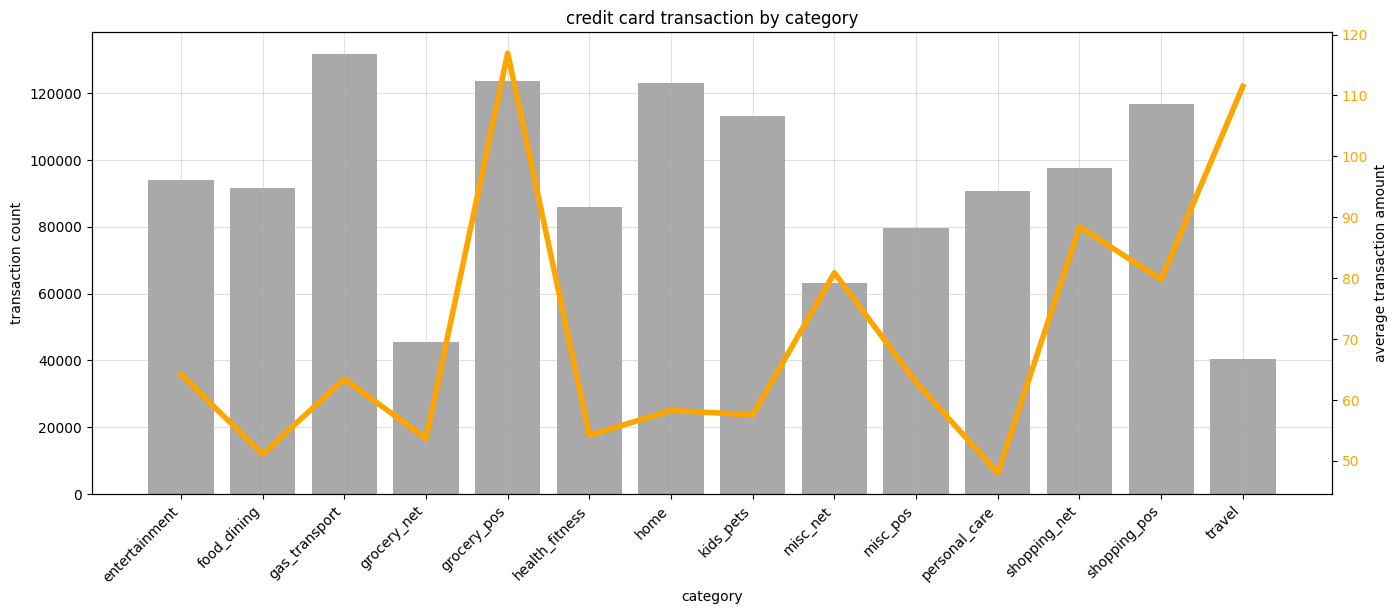

In [160]:
fig, ax1 = plt.subplots(figsize=(16, 6))

plt.title('credit card transaction by category')

ax1.bar(merge_category_count.index, merge_category_count['count'], color = '#A9A9A9', alpha=1.0)
ax1.set_xlabel('category')
ax1.set_ylabel('transaction count')
ax1.grid(True, alpha=0.4)
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(merge_category_count.index,merge_category_count['average transaction amount'], color = 'orange', lw=4)
ax2.set_ylabel('average transaction amount')
ax2.tick_params(axis='y', labelcolor='orange')

xticklabels = ax1.get_xticklabels()

plt.setp(xticklabels, rotation=45, ha='right')
plt.show()


In [166]:
merchant_transaction_count = transaction_pattern_df['merchant'].value_counts()

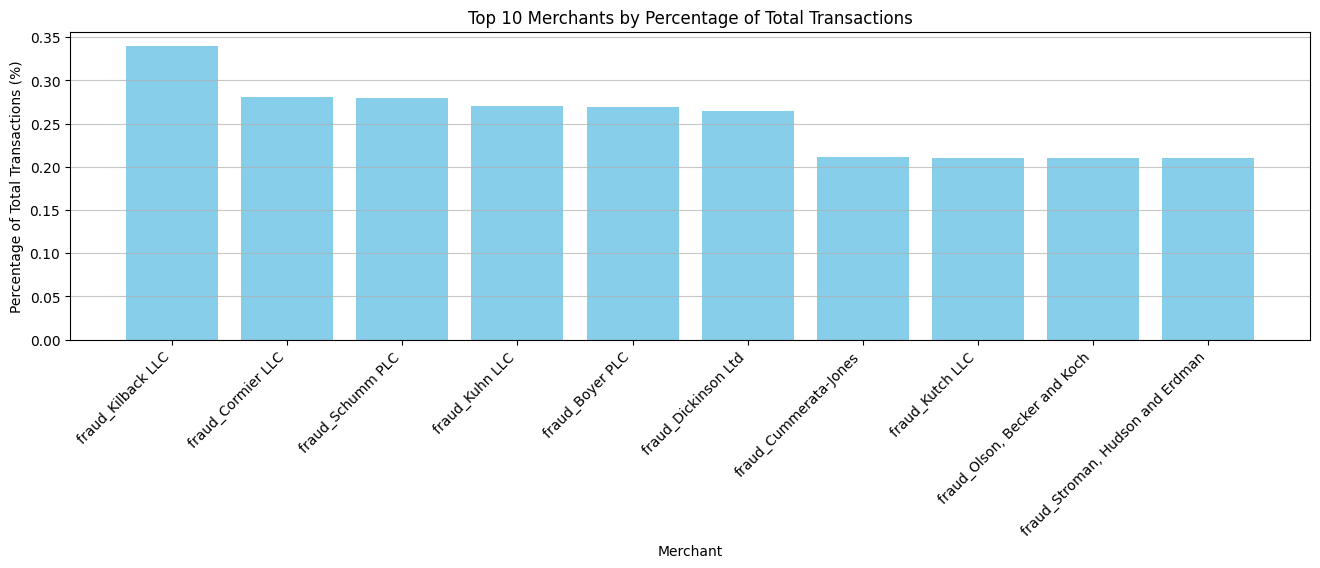

In [162]:
total_count = merchant_transaction_count.sum()
percentages = (merchant_transaction_count / total_count) * 100

top_10 = percentages.nlargest(10)

labels = top_10.index.tolist() 
height = top_10.values.tolist()

plt.figure(figsize=(16, 4))  
bars = plt.bar(labels, height=height, color='skyblue')
plt.ylabel('Percentage of Total Transactions (%)')  
plt.xlabel('Merchant')  
plt.title('Top 10 Merchants by Percentage of Total Transactions')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', alpha=0.7) 

plt.show()

### Conclusion [4]

<p> 
gas_transport category record the highest number of transactions<br>
The grocery purchase over pos category has the highest average transaction amount, spiking significantly above other categories. "travel" also shows a relatively high average transaction amount. <br>
The combination of a high transaction count and the highest average transaction amount indicates that while groceries are purchased frequently in-store, each purchase tends to involve a significant spending amount.<br>
In contrast, grocery on internet (grocery_net) has a relatively lower average spending amount. <br>
The low transaction count but relatively high average amount strongly suggests that while travel-reated expenses are infrequent, they tend to be substantial when they occur <br>
Credit card transaction has been evenly distributed and is not dominated by a single merchant
</p>

### [5] Fraud Analysis

In [187]:
fraud_df = df.copy()

In [188]:
fraud_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [189]:
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df.trans_date_trans_time)

In [200]:
fraud_df['month'] = fraud_df.trans_date_trans_time.dt.strftime('%Y%m')

In [195]:
fraud_by_month = fraud_df.groupby('month')['is_fraud']

In [220]:
# Calculate the average number of fraudulent transactions per month
# no significant amount < 1 % of the transaction are fraudulent
fraud_by_month = fraud_df.groupby('month')['is_fraud']
avg_fraud_per_month = fraud_by_month.sum() / fraud_by_month.count() * 100
avg_fraud_per_month

month
201901    0.963351
201902    1.036779
201903    0.696373
201904    0.552308
201905    0.562510
201906    0.411322
201907    0.382235
201908    0.437276
201909    0.591632
201910    0.660287
201911    0.550972
201912    0.419680
202001    0.657063
202002    0.703061
202003    0.609472
202004    0.451474
202005    0.708876
202006    0.578385
Name: is_fraud, dtype: float64

In [209]:
# Calculate the average number of fraudulent transactions per category
fraud_by_category = fraud_df.groupby('category')['is_fraud']
avg_fraud_per_category = fraud_by_category.sum() / fraud_by_category.count() * 100
avg_fraud_per_category

C:\Users\chia_\AppData\Local\Temp\ipykernel_6712\3570283470.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_category = fraud_df.groupby('category')['is_fraud']


category
entertainment     0.247835
food_dining       0.165098
gas_transport     0.469394
grocery_net       0.294817
grocery_pos       1.409761
health_fitness    0.154869
home              0.160825
kids_pets         0.211439
misc_net          1.445795
misc_pos          0.313853
personal_care     0.242403
shopping_net      1.756149
shopping_pos      0.722538
travel            0.286370
Name: is_fraud, dtype: float64

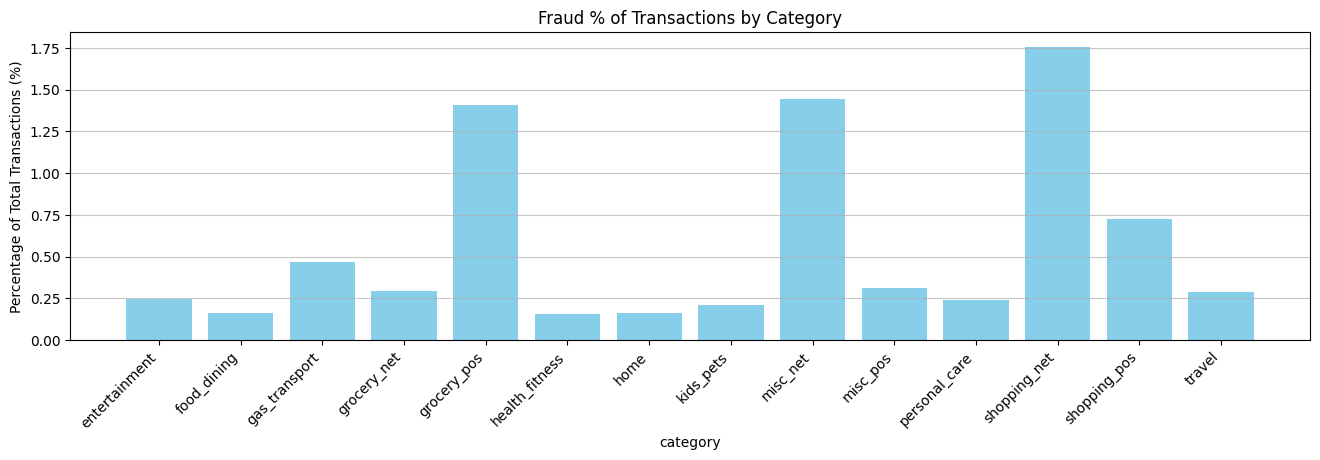

In [222]:
plt.figure(figsize=(16, 4))  

plt.title('Fraud % of Transactions by Category')

bars = plt.bar(avg_fraud_per_category.index, height=avg_fraud_per_category.values, color='skyblue')
plt.ylabel('Percentage of Total Transactions (%)')  
plt.xlabel('category')  

plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', alpha=0.7) 

In [219]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '>1000']
fraud_df['amount_range'] = pd.cut(fraud_df['amt'], bins=bins, labels=labels, right=False)


In [223]:
# Calculate the average number of fraudulent transactions by amount
# high amount range has significant more % in fraud
fraud_by_amount_range = fraud_df.groupby('amount_range')['is_fraud']
avg_fraud_per_amount_range = fraud_by_amount_range.sum() / fraud_by_amount_range.count() * 100
avg_fraud_per_amount_range

C:\Users\chia_\AppData\Local\Temp\ipykernel_6712\1698509171.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_amount_range = fraud_df.groupby('amount_range')['is_fraud']


amount_range
0-100        0.155595
100-200      0.086697
200-300      2.513357
300-400     13.488372
400-500      1.664469
500-600      2.062308
600-700      8.586118
700-800     34.712042
800-900     49.493746
900-1000    58.863920
>1000       24.130048
Name: is_fraud, dtype: float64

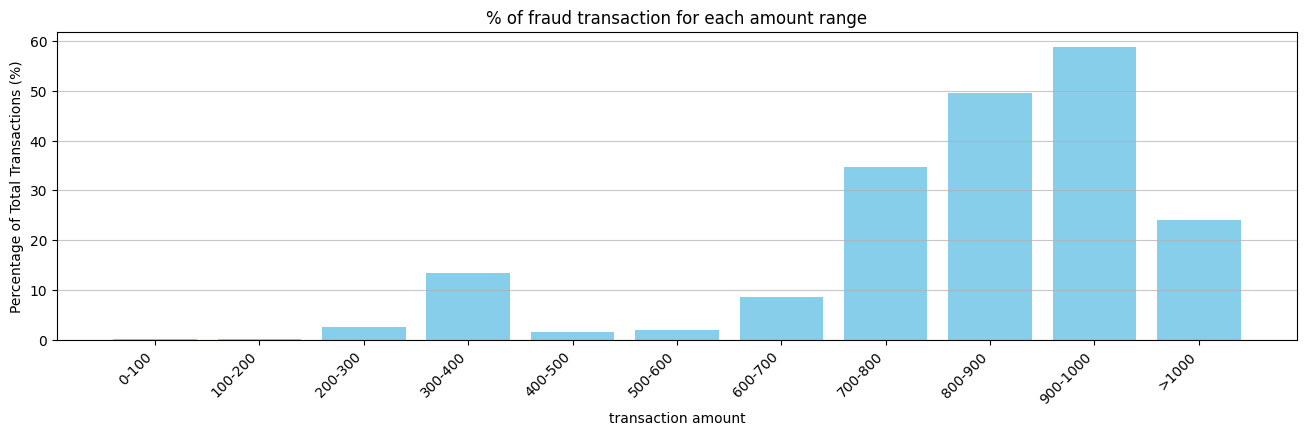

In [225]:
plt.figure(figsize=(16, 4))  

plt.title('% of fraud transaction for each amount range')

bars = plt.bar(avg_fraud_per_amount_range.index, height=avg_fraud_per_amount_range.values, color='skyblue')
plt.ylabel('Percentage of Total Transactions (%)')  
plt.xlabel('transaction amount')  

plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', alpha=0.7) 

### Conclusion [5]

<p> 
The Misc and shopping credit card over online channel having a relatively high of 1.44% and 1.75% in fraud<br>
While on Offline channel, grocery purchase over pos category having a high 1.4 % in fraud<br>

The percentage of fraud transactions is extremely low amount(0-100, 100-200) for the transaction <br>
As the transaction amount increases, there's a noticeable upward trend in the percentage of fraudulent transactions. This suggests that higher-value transactions are more attractive targets for fraud.<br>
Substantial increases in fraud percentage occur in the 800-900 and 900-1000 amount ranges indicating a critical vulnerability or a strong incentive for fraudulent activity at these price points<br>

</p>